In [28]:
# Set Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [29]:
# Read in the csv
df1 = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [30]:
parsed_data = df1[df1.duplicated('description', keep=False)].copy()
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20026 entries, 9 to 129913
Data columns (total 14 columns):
Unnamed: 0               20026 non-null int64
country                  20018 non-null object
description              20026 non-null object
designation              14162 non-null object
points                   20026 non-null int64
price                    18814 non-null float64
province                 20018 non-null object
region_1                 16648 non-null object
region_2                 7498 non-null object
taster_name              17362 non-null object
taster_twitter_handle    16482 non-null object
title                    20026 non-null object
variety                  20026 non-null object
winery                   20026 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 2.3+ MB


In [31]:
# parsed_data.dropna(subset=['description', 'points', 'price', 'country', "variety"], inplace=True)
parsed_data.dropna(subset=['description', 'points', 'price', 'country', "region_1", "variety", "winery"], inplace=True)

In [32]:
# df2 = parsed_data[['description','points','price', 'country', "variety"]]
df2 = parsed_data[['description','points','price', 'country', "region_1", "variety", "winery"]]
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15686 entries, 9 to 129913
Data columns (total 7 columns):
description    15686 non-null object
points         15686 non-null int64
price          15686 non-null float64
country        15686 non-null object
region_1       15686 non-null object
variety        15686 non-null object
winery         15686 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 980.4+ KB


,description,points,price,country,region_1,variety,winery
9,This has great depth of flavor with its fresh ...,87,27.0,France,Alsace,Pinot Gris,Jean-Baptiste Adam
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,US,Napa Valley,Cabernet Sauvignon,Kirkland Signature
11,"This is a dry wine, very spicy, with a tight, ...",87,30.0,France,Alsace,Gewürztraminer,Leon Beyer
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,US,Alexander Valley,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,US,Central Coast,Chardonnay,Mirassou


In [33]:
df2['country'].unique()

array(['France', 'US', 'Argentina', 'Italy', 'Australia', 'Spain',
       'Canada'], dtype=object)

In [34]:
df2['variety'].unique()

array(['Pinot Gris', 'Cabernet Sauvignon', 'Gewürztraminer', 'Chardonnay',
       'Malbec', 'Merlot', 'Pinot Noir', 'Gamay', 'Red Blend', 'Inzolia',
       'Riesling', 'Sauvignon Blanc', 'Monica',
       'Bordeaux-style White Blend', 'Grillo', 'Syrah', 'Sangiovese',
       'Tannat-Cabernet', 'Cabernet Franc', 'White Blend', 'G-S-M',
       'Zinfandel', 'Rhône-style Red Blend', 'Fumé Blanc', 'Pinot Bianco',
       'Shiraz', 'Rosé', 'Tempranillo', 'Sparkling Blend',
       'Grenache Blanc', 'Nebbiolo', 'Cortese', 'Champagne Blend',
       'Glera', 'Pinot Grigio', 'Bonarda', 'Aglianico',
       'Bordeaux-style Red Blend', 'Colombard', 'Tempranillo Blend',
       'Corvina, Rondinella, Molinara', "Nero d'Avola", 'Insolia',
       'Tannat-Syrah', 'Petite Sirah', 'Pinot Nero', 'Sherry', 'Greco',
       'Viura', 'Viognier', 'Sauvignon', 'Albariño', 'Vermentino',
       'Turbiana', 'Barbera', 'Montepulciano', 'Muscat', 'Chenin Blanc',
       'Sangiovese Grosso', 'Monastrell', 'Traminette', 'Mel

In [35]:
# 1 -> Points 80 to 84 (Under Average wines)

# 2 -> Points 84 to 88 (Average wines)

# 3 -> Points 88 to 92 (Good wines)

# 4 -> Points 92 to 96 (Very Good wines)

# 5 -> Points 96 to 100 (Excellent wines)

#Transform method taking points as param
def transform_points_simplified(points):
    if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5

#Applying transform method and assigning result to new column "points_simplified"
df2 = df2.assign(points_simplified = df2['points'].apply(transform_points_simplified))
df2.head()

,description,points,price,country,region_1,variety,winery,points_simplified
9,This has great depth of flavor with its fresh ...,87,27.0,France,Alsace,Pinot Gris,Jean-Baptiste Adam,2
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,US,Napa Valley,Cabernet Sauvignon,Kirkland Signature,2
11,"This is a dry wine, very spicy, with a tight, ...",87,30.0,France,Alsace,Gewürztraminer,Leon Beyer,2
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,US,Alexander Valley,Cabernet Sauvignon,Louis M. Martini,2
14,Building on 150 years and six generations of w...,87,12.0,US,Central Coast,Chardonnay,Mirassou,2


In [36]:
df2['finaltextinput'] = df2['description'] + ' ' + df2['country'] + ' ' + df2['variety'] 
df2["finaltextinput2"] = df2["description"]+ " " +df2["country"]+ " " +df2["region_1"]+ " " +df2["variety"]+ " " +df2["winery"]
df2.head()
# df2.iloc[0,5]

,description,points,price,country,region_1,variety,winery,points_simplified,finaltextinput,finaltextinput2
9,This has great depth of flavor with its fresh ...,87,27.0,France,Alsace,Pinot Gris,Jean-Baptiste Adam,2,This has great depth of flavor with its fresh ...,This has great depth of flavor with its fresh ...
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,US,Napa Valley,Cabernet Sauvignon,Kirkland Signature,2,"Soft, supple plum envelopes an oaky structure ...","Soft, supple plum envelopes an oaky structure ..."
11,"This is a dry wine, very spicy, with a tight, ...",87,30.0,France,Alsace,Gewürztraminer,Leon Beyer,2,"This is a dry wine, very spicy, with a tight, ...","This is a dry wine, very spicy, with a tight, ..."
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,US,Alexander Valley,Cabernet Sauvignon,Louis M. Martini,2,"Slightly reduced, this wine offers a chalky, t...","Slightly reduced, this wine offers a chalky, t..."
14,Building on 150 years and six generations of w...,87,12.0,US,Central Coast,Chardonnay,Mirassou,2,Building on 150 years and six generations of w...,Building on 150 years and six generations of w...


In [ ]:
# Convert df2 to a sqlite database for reference
from sqlalchemy import create_engine
engine = create_engine('sqlite:///wines.sqlite', echo=False)

In [ ]:
# Convert to sqlite
df2.to_sql('wines', con=engine, if_exists="replace")

In [ ]:
def lower_all(input_string):
    return input_string.lower()

Example1 = "This is a Great wine"

print(lower_all(Example1))

In [ ]:
# df2["finaltextinput"] = df2["finaltextinput"].apply(lower_all)
# df2.iloc[0,8]

### Define variables ###

In [49]:
# For RandomForestClassifier
X11 = df2['finaltextinput']
y11 = df2['points_simplified']

X21 = df2['price']

# For RandomForestRegressor
X12 = df2['finaltextinput2']
X12 = df2['finaltextinput']
y12 = df2['price']

X22 = df2['points']

### Random Forest Classifier ###

In [ ]:
vectorizer = CountVectorizer()
vec_rfc = vectorizer.fit(X11)

In [ ]:
with open('winevect_rfc_model.pickle', 'wb') as handle:
    pickle.dump(vec_rfc, handle)

In [ ]:
# with open('winevect_model.pickle', 'rb') as handle:
#     loaded_vec = pickle.load(handle)

In [ ]:
# X = loaded_vec.transform(X11)

In [ ]:
X = vectorizer.transform(X11)

In [ ]:
# print(X)

In [ ]:
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))

In [ ]:
pd.DataFrame.sparse.from_spmatrix(X)

In [ ]:
X21.reset_index(drop = True, inplace = True)

In [ ]:
Z1 =pd.DataFrame.sparse.from_spmatrix(X).join(X21)
Z1.head()

In [ ]:
# import numpy as np 

# variable = np.array(Z[:1])

# Z[:1]

# len(variable[0])

# #10763

# variable[0][10762]

In [ ]:
#Z.tail
# X21.head()

In [ ]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(Z1, y11, test_size=0.1, random_state=101)
rfc = RandomForestClassifier(verbose = True)
rfc.fit(X_train, y_train)

#save the model 

with open('wine_rfc_model.pickle', 'wb') as handle:
    pickle.dump(rfc, handle)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)


# Testing the model
predictions = rfc.predict(X_test)


In [ ]:
testing_score = rfc.score(X_test, y_test)
print(testing_score)

In [ ]:
# rfc.feature_importances_[10762]

In [ ]:
# def user_input(input_desc, input_country, input_price)

# input_desc = lower_all(input_desc)
# input_country = lower_all(input_country)
# input_price = [float(input_price)]


# vectorizer.transform(input_desc)

In [ ]:
# X_example = vectorizer.transform(["this wine is ripe, smooth, and delectable. enjoy its lovely aromas and flavors of ripe fruit and oak with a well-seasoned roast leg of lamb.. us"])
# input_price = [float(90)]
# X2_example = pd.Series(input_price, name = "price")

In [ ]:
# print(X_example)

In [ ]:
# pd.DataFrame.sparse.from_spmatrix(X_example)

In [ ]:
# X2.reset_index(drop = True, inplace = True)

In [ ]:
# print(X2)

In [ ]:
# Z_example =pd.DataFrame.sparse.from_spmatrix(X_example).join(X2_example)

In [ ]:
# X2_example 


In [ ]:
# rfc.predict(Z_example)

In [ ]:
# with open('wine_rfc_model.pickle', 'rb') as handle:
#     loaded_rfc = pickle.load(handle)


In [ ]:
# loaded_rfc.predict(Z_example)

### Random Forest Regressor ###

In [50]:
vectorizer = CountVectorizer()
vec_rfr = vectorizer.fit(X12)
    
X = vectorizer.fit_transform(X12)

In [51]:
with open('winevect_rfr_model.pickle', 'wb') as handle:
    pickle.dump(vec_rfr, handle)

In [52]:
X.shape

(15686, 9867)

In [53]:
# X = vectorizer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (15686, 9867)
Amount of Non-Zero occurrences:  573244
Density: 0.37037543870000394


In [54]:
pd.DataFrame.sparse.from_spmatrix(X)

,0,1,2,3,4,5,6,7,8,9,...,9857,9858,9859,9860,9861,9862,9863,9864,9865,9866
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X22.reset_index(drop = True, inplace = True)

In [56]:
Z2 =pd.DataFrame.sparse.from_spmatrix(X).join(X22)
Z2.head()

,0,1,2,3,4,5,6,7,8,9,...,9858,9859,9860,9861,9862,9863,9864,9865,9866,points
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87


In [57]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(Z2, y12, random_state=42)

In [58]:
# Training the model

rfr = RandomForestRegressor(verbose=True, n_jobs=-1)
rfr.fit(X_train, y_train)

#save the model 

with open('wine_rfr_model.pickle', 'wb') as handle:
    pickle.dump(rfr, handle)

# with open('wine_rfr_model.pickle', 'rb') as handle:
#   pickle.load(rfr, handle)


/Users/filipuccia/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   14.4s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.3s finished


In [59]:
# Testing the model
predictions = rfr.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [60]:
training_score_vect = rfr.score(X_train, y_train)
testing_score_vect = rfr.score(X_test, y_test)

print(f"Training Score with Vectorizing: {training_score_vect}")
print(f"Testing Score with Vectorizing: {testing_score_vect}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


Training Score with Vectorizing: 0.9494869585598354
Testing Score with Vectorizing: 0.8128526698333319


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


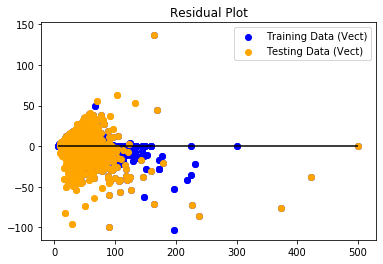

In [61]:
# Plot the Residuals for the Training and Testing data with *=* wine3_df *=*

plt.scatter(rfr.predict(X_train), rfr.predict(X_train) - y_train, c="blue", label="Training Data (Vect)")
plt.scatter(rfr.predict(X_test), rfr.predict(X_test) - y_test, c="orange", label="Testing Data (Vect)")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
X_example = vectorizer.transform(["this wine is ripe, smooth, and delectable. enjoy its lovely aromas and flavors of ripe fruit and oak with a well-seasoned roast leg of lamb. us"])
input_points = [float(3)]
X22_example = pd.Series(input_points, name = "points")

In [ ]:
pd.DataFrame.sparse.from_spmatrix(X_example)

In [ ]:
X22_example.reset_index(drop = True, inplace = True)

In [ ]:
Z2_example =pd.DataFrame.sparse.from_spmatrix(X_example).join(X22_example)

In [ ]:
rfr.predict(Z2_example)